In [ ]:
!pip install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 45 kB/s 
     |████████████████████████████████| 199 kB 48.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=fa4bd7555ae9fe2d855297f1b9677c968ac62d5f80cb1fd2d6cd0b2ab971573f
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("test").getOrCreate()
spark

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from pyspark import SparkContext
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SQLContext

%matplotlib inline



In [ ]:
data_df = spark.read.csv("/content/drive/MyDrive/IRIS.csv",inferSchema =True,header = True)
data_df.show()

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|    species|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|
|         4.9|        3.1|         1.5|        0.1|Iris-setosa|
|         5.4|        3.7|         1.5|        0.2|Iris-setosa|
|         4.8|        3.4|         1.6|        0.2|Iris-setosa|
|         4.8|        3.0|         1.4| 

In [ ]:
data_df = data_df.na.drop()
data_df.show()

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|    species|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|
|         4.9|        3.1|         1.5|        0.1|Iris-setosa|
|         5.4|        3.7|         1.5|        0.2|Iris-setosa|
|         4.8|        3.4|         1.6|        0.2|Iris-setosa|
|         4.8|        3.0|         1.4| 

In [ ]:
data_df1 = data_df.drop('petal_width','species')
data_df1.show()

+------------+-----------+------------+
|sepal_length|sepal_width|petal_length|
+------------+-----------+------------+
|         5.1|        3.5|         1.4|
|         4.9|        3.0|         1.4|
|         4.7|        3.2|         1.3|
|         4.6|        3.1|         1.5|
|         5.0|        3.6|         1.4|
|         5.4|        3.9|         1.7|
|         4.6|        3.4|         1.4|
|         5.0|        3.4|         1.5|
|         4.4|        2.9|         1.4|
|         4.9|        3.1|         1.5|
|         5.4|        3.7|         1.5|
|         4.8|        3.4|         1.6|
|         4.8|        3.0|         1.4|
|         4.3|        3.0|         1.1|
|         5.8|        4.0|         1.2|
|         5.7|        4.4|         1.5|
|         5.4|        3.9|         1.3|
|         5.1|        3.5|         1.4|
|         5.7|        3.8|         1.7|
|         5.1|        3.8|         1.5|
+------------+-----------+------------+
only showing top 20 rows



In [ ]:
data_df1.columns


['id', 'sepal_length', 'sepal_width', 'petal_length']

In [ ]:
feature_columns = ['id', 'sepal_length', 'sepal_width', 'petal_length']


In [ ]:
from pyspark.sql.window import Window
import pyspark.sql.functions as F
from pyspark.sql.functions import row_number
 
data_df1 = data_df1.select( F.row_number().over(Window.partitionBy().orderBy(data_df1['sepal_length'])).alias("id"),"sepal_length","sepal_width","petal_length")
data_df1.show()

+---+------------+-----------+------------+
| id|sepal_length|sepal_width|petal_length|
+---+------------+-----------+------------+
|  1|         4.3|        3.0|         1.1|
|  2|         4.4|        2.9|         1.4|
|  3|         4.4|        3.0|         1.3|
|  4|         4.4|        3.2|         1.3|
|  5|         4.5|        2.3|         1.3|
|  6|         4.6|        3.4|         1.4|
|  7|         4.6|        3.6|         1.0|
|  8|         4.6|        3.1|         1.5|
|  9|         4.6|        3.2|         1.4|
| 10|         4.7|        3.2|         1.3|
| 11|         4.7|        3.2|         1.6|
| 12|         4.8|        3.4|         1.9|
| 13|         4.8|        3.0|         1.4|
| 14|         4.8|        3.1|         1.6|
| 15|         4.8|        3.4|         1.6|
| 16|         4.8|        3.0|         1.4|
| 17|         4.9|        3.1|         1.5|
| 18|         4.9|        3.1|         1.5|
| 19|         4.9|        3.1|         1.5|
| 20|         4.9|        3.0|  

In [ ]:
vecAssembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_kmeans = vecAssembler.transform(data_df1).select('id', 'features','sepal_length','sepal_width','petal_length')
df_kmeans.show()

+---+------------------+------------+-----------+------------+
| id|          features|sepal_length|sepal_width|petal_length|
+---+------------------+------------+-----------+------------+
|  1| [1.0,4.3,3.0,1.1]|         4.3|        3.0|         1.1|
|  2| [2.0,4.4,2.9,1.4]|         4.4|        2.9|         1.4|
|  3| [3.0,4.4,3.0,1.3]|         4.4|        3.0|         1.3|
|  4| [4.0,4.4,3.2,1.3]|         4.4|        3.2|         1.3|
|  5| [5.0,4.5,2.3,1.3]|         4.5|        2.3|         1.3|
|  6| [6.0,4.6,3.1,1.5]|         4.6|        3.1|         1.5|
|  7| [7.0,4.6,3.4,1.4]|         4.6|        3.4|         1.4|
|  8| [8.0,4.6,3.6,1.0]|         4.6|        3.6|         1.0|
|  9| [9.0,4.6,3.2,1.4]|         4.6|        3.2|         1.4|
| 10|[10.0,4.7,3.2,1.3]|         4.7|        3.2|         1.3|
| 11|[11.0,4.7,3.2,1.6]|         4.7|        3.2|         1.6|
| 12|[12.0,4.8,3.4,1.6]|         4.8|        3.4|         1.6|
| 13|[13.0,4.8,3.0,1.4]|         4.8|        3.0|      

In [ ]:
k = 10
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df_kmeans)
centers = model.clusterCenters()

print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[85.5      5.96875  2.83125  4.70625]
[10.5    4.67   3.115  1.42 ]
[137.5    7.01   3.17   5.55]
[50.          5.37368421  3.21578947  2.50526316]
[30.5    5.03   3.245  1.935]
[101.           6.24666667   2.84         5.04666667]
[68.5         5.68888889  2.98333333  3.72777778]
[146.5      7.625    3.0875   6.475 ]
[115.           6.45384615   2.96923077   5.14615385]
[127.           6.70909091   3.01818182   5.16363636]


In [ ]:
transformed = model.transform(df_kmeans).select('id', 'prediction','sepal_length','sepal_width','petal_length')
rows = transformed.collect()
print(rows[:3])


[Row(id=1, prediction=1, sepal_length=4.3, sepal_width=3.0, petal_length=1.1), Row(id=2, prediction=1, sepal_length=4.4, sepal_width=2.9, petal_length=1.4), Row(id=3, prediction=1, sepal_length=4.4, sepal_width=3.0, petal_length=1.3)]


In [ ]:
from pyspark.sql import SQLContext
sqlContext = spark
df_pred = sqlContext.createDataFrame(rows)
df_pred.show()

+---+----------+------------+-----------+------------+
| id|prediction|sepal_length|sepal_width|petal_length|
+---+----------+------------+-----------+------------+
|  1|         1|         4.3|        3.0|         1.1|
|  2|         1|         4.4|        2.9|         1.4|
|  3|         1|         4.4|        3.0|         1.3|
|  4|         1|         4.4|        3.2|         1.3|
|  5|         1|         4.5|        2.3|         1.3|
|  6|         1|         4.6|        3.1|         1.5|
|  7|         1|         4.6|        3.4|         1.4|
|  8|         1|         4.6|        3.6|         1.0|
|  9|         1|         4.6|        3.2|         1.4|
| 10|         1|         4.7|        3.2|         1.3|
| 11|         1|         4.7|        3.2|         1.6|
| 12|         1|         4.8|        3.4|         1.6|
| 13|         1|         4.8|        3.0|         1.4|
| 14|         1|         4.8|        3.4|         1.9|
| 15|         1|         4.8|        3.1|         1.6|
| 16|     

In [ ]:
pddf_pred = df_pred.toPandas().set_index('id')
pddf_pred.head()

,prediction,sepal_length,sepal_width,petal_length
id,,,,
1,1,4.3,3.0,1.1
2,1,4.4,2.9,1.4
3,1,4.4,3.0,1.3
4,1,4.4,3.2,1.3
5,1,4.5,2.3,1.3


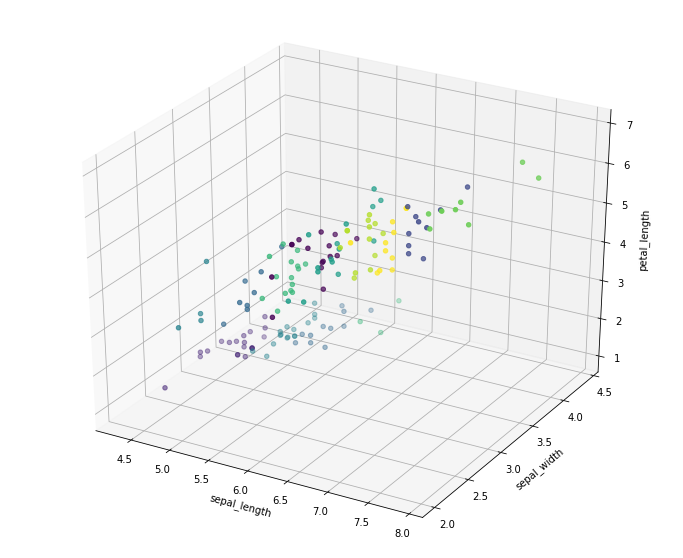

In [ ]:
threedee = plt.figure(figsize=(12,10)).gca(projection='3d')
threedee.scatter(pddf_pred.sepal_length, pddf_pred.sepal_width, pddf_pred.petal_length, c=pddf_pred.prediction)
threedee.set_xlabel('sepal_length')
threedee.set_ylabel('sepal_width')
threedee.set_zlabel('petal_length')
plt.show()